# Atividade: Transformada Rápida de Fourier (FFT) e efeito do janelamento em sinais senoidais e reais

Aluno: João Mário Carnieletto Izoton lago

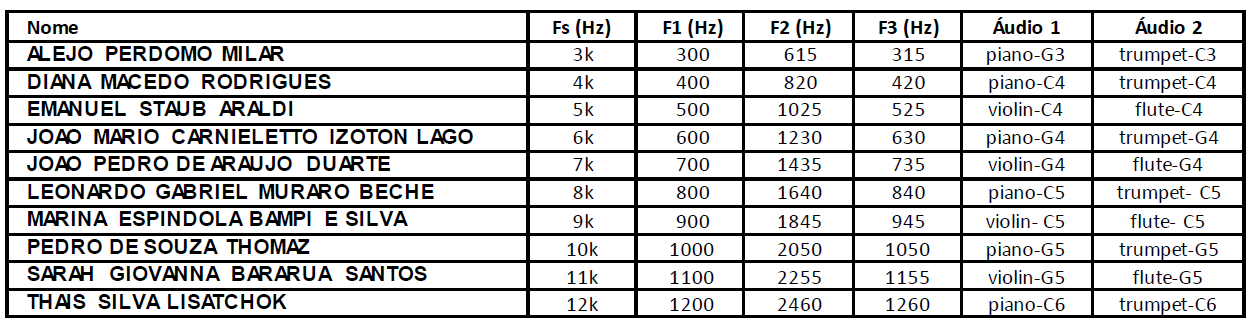

### Bibliotecas e Imports

In [1]:
%pip install -q numpy matplotlib scipy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io import wavfile

### Definição de parâmetros da tabela

In [3]:
fs = 6e3       # Sampling frequency (kHz)
ts = 1.0 / fs  # Sampling interval (ms)

# Specific frequencies to use in following exercises
f1 = 600  # (Hz)
f2 = 1230 # (Hz)
f3 = 630  # (Hz)

# Audios, tenha certeza que os arquivos estão no mesmo diretório que o notebook
audio1 = "piano-G4.wav"
audio2 = "trumpet-G4.wav"

---

## Efeito da resolução (número de bins) de um sinal senoidal

1. Gere um sinal que consiste na soma de duas senoides de frequências F1 e F2, amostradas com uma frequência de amostragem Fs (veja os valores individuais na listagem acima). Depois, use a função `fft` para calcular os coeficientes $X(k)$ da DFT, com N=100. Apresente o gráfico da magnitude da FFT.

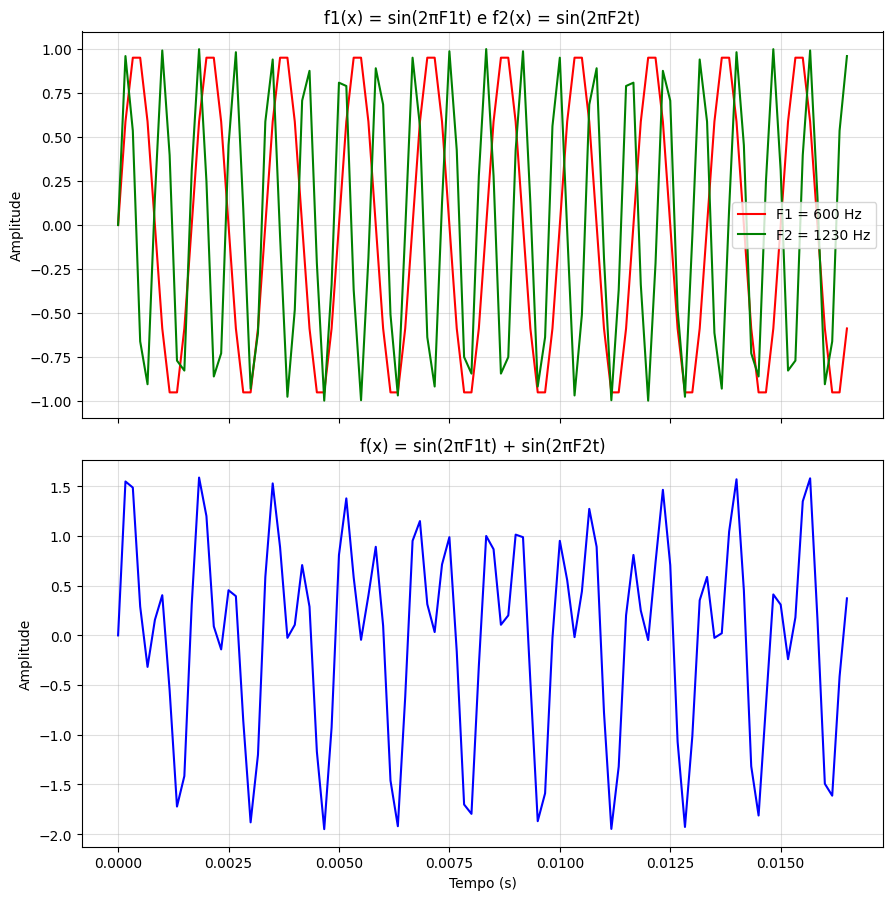

In [4]:
N = 100

t = np.arange(0, N * ts, ts)

x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)

x = x1 + x2

fig, axs = plt.subplots(2, sharex=True)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(9)
fig.set_figwidth(9)
fig.tight_layout(pad=2.0)

axs[0].plot(t, x1, "r", label = f"F1 = {f1} Hz")
axs[0].plot(t, x2, "g", label = f"F2 = {f2} Hz")

axs[0].set_title('f1(x) = sin(2πF1t) e f2(x) = sin(2πF2t)')
axs[0].set_ylabel('Amplitude')
axs[0].legend(loc = 0, frameon = True)

axs[1].plot(t, x, "b")
axs[1].set_title('f(x) = sin(2πF1t) + sin(2πF2t)')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Amplitude')

plt.show()

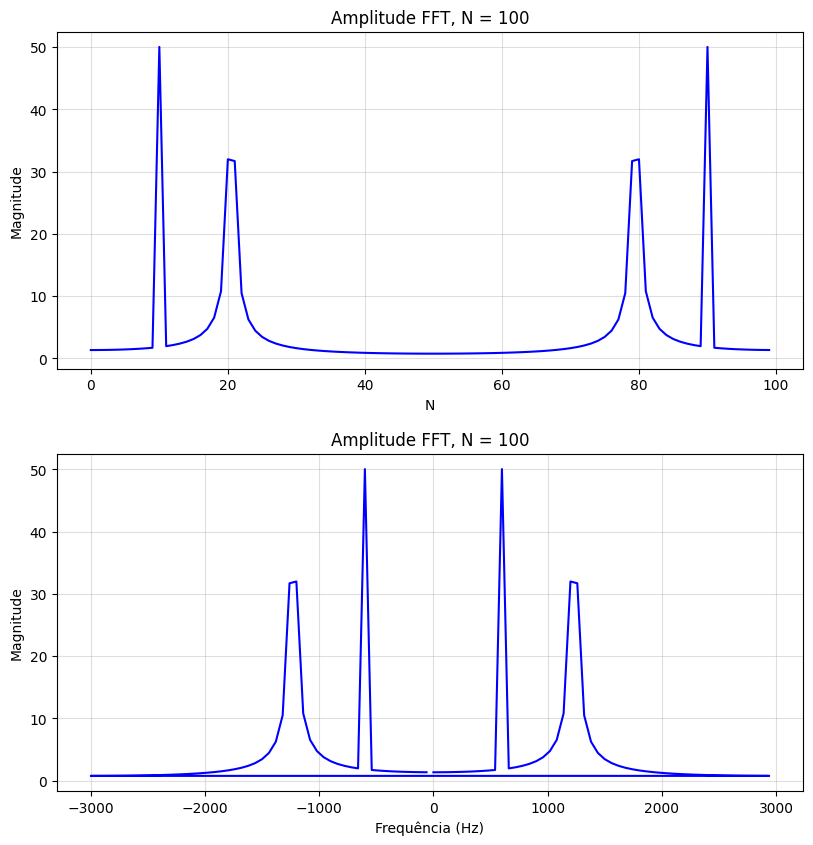

In [5]:
X = np.fft.fft(x, N)
n = np.arange(N)
freq = np.fft.fftfreq(N, d=1 / fs)

fig, axs = plt.subplots(2)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(9)
fig.set_figwidth(9)
fig.tight_layout(pad=4.0)

axs[0].plot(n, abs(X), "b")
axs[0].set_title('Amplitude FFT, N = 100')
axs[0].set_ylabel('Magnitude')
axs[0].set_xlabel('N')

axs[1].plot(freq, abs(X), "b")
axs[1].set_title('Amplitude FFT, N = 100')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequência (Hz)')

plt.show()

---

### a. Qual a resolução de frequência nesse caso?

$$
RF = \frac{Fs}{N} = \frac{6000}{100} = 60 Hz.
$$

Conforme o tempo de observação do sinal se prolonga, a quantidade de amostras aumenta, o que leva a uma diminuição na resolução em frequência (RF).

---

### b. Quais índices de frequência correspondem às senoides de frequências F1 e F2?

$$
F1_i = \frac{F1}{RF} = \frac{600}{60} = 10
$$

$$
F2_i = \frac{F2}{RF} = \frac{1230}{60} = 20.5
$$

---

### c. Como a transformada de Fourier de uma função senoidal é uma função delta, por que não encontramos duas linhas simples no gráfico da FFT? Experimente usar a função `stem` no lugar de `plot`. 

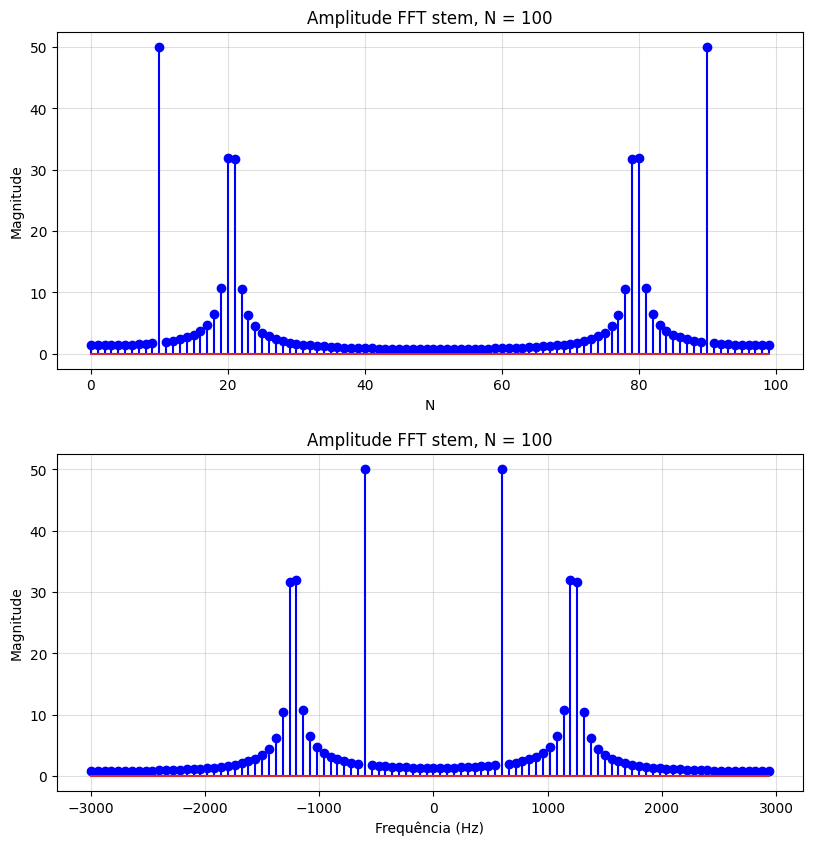

In [6]:
X = np.fft.fft(x, N)
n = np.arange(N)
freq = np.fft.fftfreq(N, d=1 / fs)

fig, axs = plt.subplots(2)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(9)
fig.set_figwidth(9)
fig.tight_layout(pad=4.0)

axs[0].stem(n, abs(X), "b")
axs[0].set_title('Amplitude FFT stem, N = 100')
axs[0].set_ylabel('Magnitude')
axs[0].set_xlabel('N')

axs[1].stem(freq, abs(X), "b")
axs[1].set_title('Amplitude FFT stem, N = 100')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequência (Hz)')

plt.show()

plt.show()

Na visualização da FFT de uma senoide gerada matematicamente, deveríamos observar duas linhas finas correspondentes às frequências positiva e negativa da onda. No entanto, na prática, isso não ocorre de forma ideal devido à resolução finita em frequência (causada pelo número limitado de amostras e pelo tempo de observação). Além disso, a FFT gera uma versão discreta da transformada de Fourier, que pode produzir efeitos de espalhamento de energia em torno da frequência central, conhecido como efeito de janela. O uso da função stem pode ajudar a visualizar melhor os componentes discretos da FFT, destacando as frequências dominantes.

---

### d. Por que o espectro da senoide de F2 sofreu espalhamento?

O espalhamento do espectro da senoide F2 é causado pelo fenômeno de vazamento espectral, que ocorre quando o sinal não é amostrado de forma adequada em termos de alinhamento com os limites da janela de análise. Isso acontece quando a frequência da senoide F2 não coincide exatamente com um dos bins de frequência da FFT, resultando em uma dispersão da energia da frequência ao longo de várias frequências próximas. Esse vazamento ocorre independentemente da presença de outros sinais, sendo uma consequência do processo de amostragem e da janela finita utilizada na análise.

---

### e. Aumente o número de pontos da transformada para N=200. É possível ver somente dois picos agora?

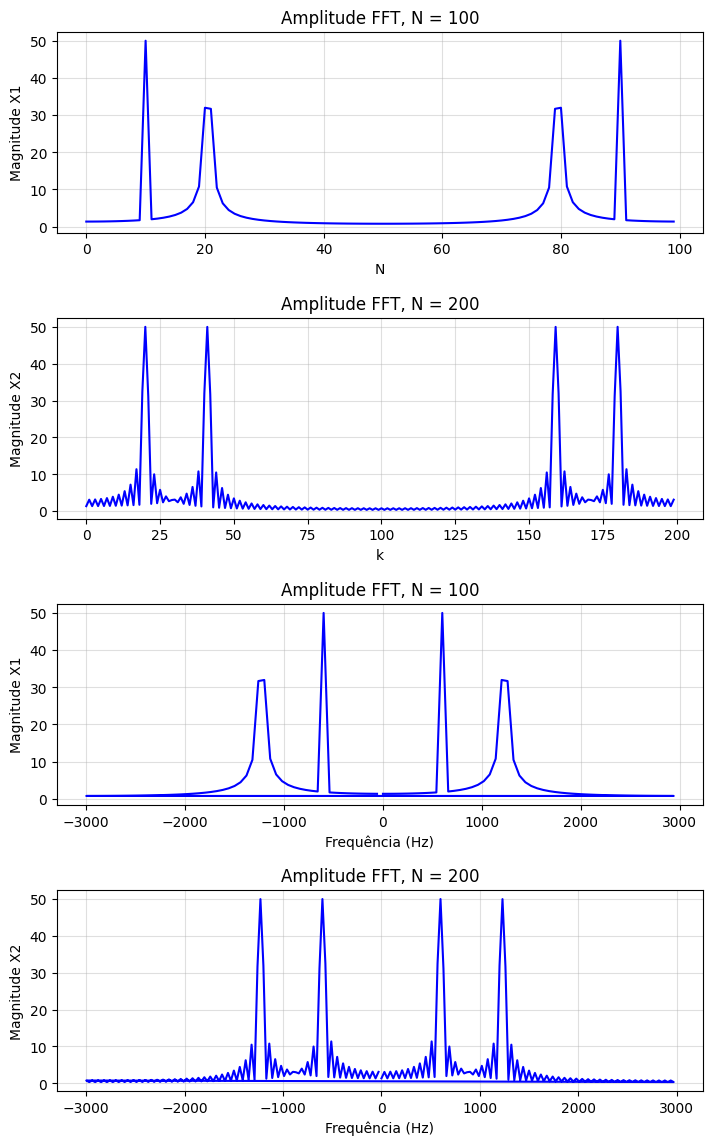

In [7]:
N1 = 100
X1 = np.fft.fft(x, N1)
n1 = np.arange(N1)
freq1 = np.fft.fftfreq(N1, d=1 / fs)

N2 = 200
X2 = np.fft.fft(x, N2)
n2 = np.arange(N2)
freq2 = np.fft.fftfreq(N2, d=1 / fs)

fig, axs = plt.subplots(4)
for ax in axs:
    ax.grid(alpha = 0.4)

fig.set_figheight(12)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].plot(n1, abs(X1), "b")
axs[0].set_title('Amplitude FFT, N = 100')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Magnitude X1')

axs[1].plot(n2, abs(X2), "b")
axs[1].set_title('Amplitude FFT, N = 200')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Magnitude X2')

axs[2].plot(freq1, abs(X1), "b")
axs[2].set_title('Amplitude FFT, N = 100')
axs[2].set_xlabel('Frequência (Hz)')
axs[2].set_ylabel('Magnitude X1')

axs[3].plot(freq2, abs(X2), "b")
axs[3].set_title('Amplitude FFT, N = 200')
axs[3].set_xlabel('Frequência (Hz)')
axs[3].set_ylabel('Magnitude X2')

plt.show()

Ao aumentar o número de pontos da FFT para N = 200, a resolução em frequência aumenta, permitindo uma melhor distinção dos picos. Como o sinal original tinha apenas 100 pontos, ao aplicar uma FFT de 200 pontos, o resultado pode não ter sido ideal. No entanto, ao gerar o sinal com pelo menos 200 pontos, os dois picos agora são claramente visíveis, pois a resolução da FFT permite uma separação melhor dos componentes de frequência.

---

### f. Gere um novo sinal que consiste na soma de duas senoides com frequências F1 e F3 (mantenha a mesma  frequência de amostragem Fs). Aplique FFT de 100 e 200 pontos. Você consegue ver os dois componentes de frequência separados usando plot e/ou stem? Por quê?

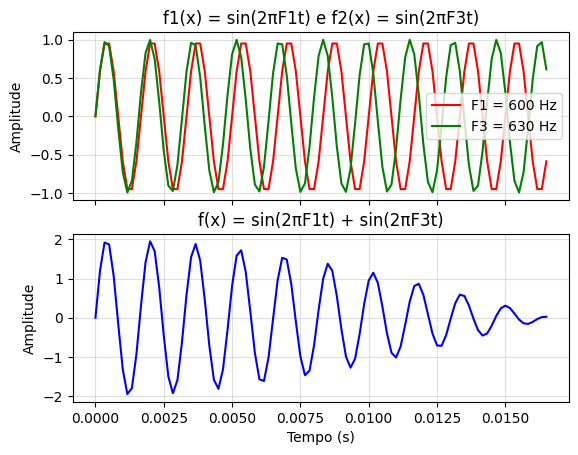

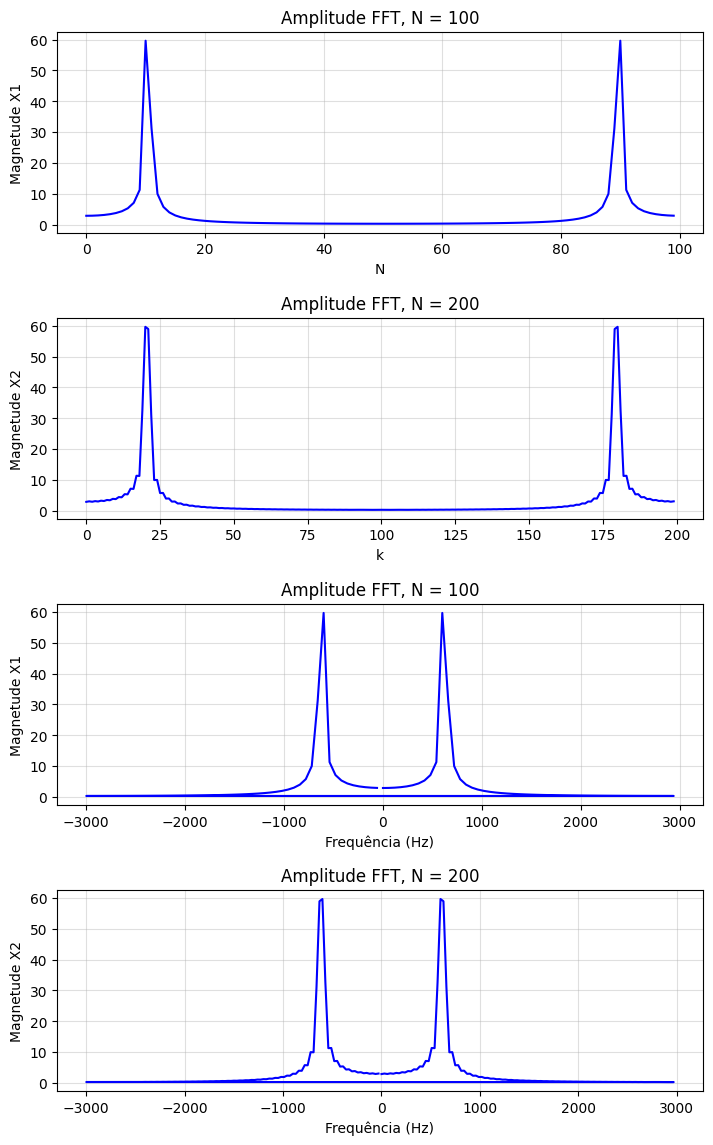

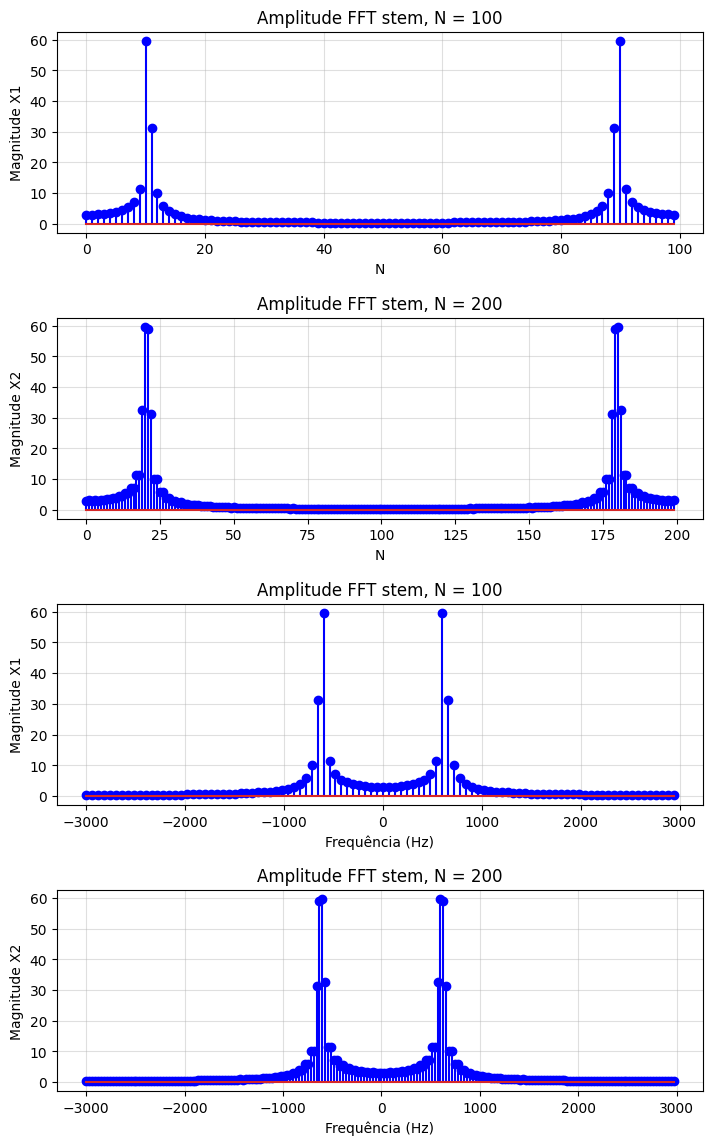

In [8]:
# For sum of sines with f1 and f3
N = 100

t = np.arange(0, N * ts, ts)

x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f3 * t)

x = x1 + x2

fig, axs = plt.subplots(2, sharex = True)
for ax in axs:
    ax.grid(alpha = 0.4)

axs[0].plot(t, x1, "r", label = f"F1 = {f1} Hz")
axs[0].plot(t, x2, "g", label = f"F3 = {f3} Hz")

axs[0].set_title('f1(x) = sin(2πF1t) e f2(x) = sin(2πF3t)')
axs[0].set_ylabel('Amplitude')
axs[0].legend(loc = 0, frameon = True)

axs[1].plot(t, x, "b")
axs[1].set_title('f(x) = sin(2πF1t) + sin(2πF3t)')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Amplitude')

plt.show()

# FFT with N = 100 and N = 200

N1 = 100
X1 = np.fft.fft(x, N1)
n1 = np.arange(N1)
freq1 = np.fft.fftfreq(N1, d=1 / fs)

N2 = 200
X2 = np.fft.fft(x, N2)
n2 = np.arange(N2)
freq2 = np.fft.fftfreq(N2, d=1 / fs)

fig, axs = plt.subplots(4)
for ax in axs:
    ax.grid(alpha = 0.4)

fig.set_figheight(12)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].plot(n1, abs(X1), "b")
axs[0].set_title('Amplitude FFT, N = 100')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Magnetude X1')

axs[1].plot(n2, abs(X2), "b")
axs[1].set_title('Amplitude FFT, N = 200')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Magnetude X2')

axs[2].plot(freq1, abs(X1), "b")
axs[2].set_title('Amplitude FFT, N = 100')
axs[2].set_xlabel('Frequência (Hz)')
axs[2].set_ylabel('Magnetude X1')

axs[3].plot(freq2, abs(X2), "b")
axs[3].set_title('Amplitude FFT, N = 200')
axs[3].set_xlabel('Frequência (Hz)')
axs[3].set_ylabel('Magnetude X2')

# FFT with N = 100 and N = 200 using stem instead of plot

plt.show()

fig, axs = plt.subplots(4)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(12)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].stem(n1, abs(X1), "b")
axs[0].set_title('Amplitude FFT stem, N = 100')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Magnitude X1')

axs[1].stem(n2, abs(X2), "b")
axs[1].set_title('Amplitude FFT stem, N = 200')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Magnitude X2')

axs[2].stem(freq1, abs(X1), "b")
axs[2].set_title('Amplitude FFT stem, N = 100')
axs[2].set_xlabel('Frequência (Hz)')
axs[2].set_ylabel('Magnitude X1')

axs[3].stem(freq2, abs(X2), "b")
axs[3].set_title('Amplitude FFT stem, N = 200')
axs[3].set_xlabel('Frequência (Hz)')
axs[3].set_ylabel('Magnitude X2')

plt.show()

Ao gerar um novo sinal com a soma das senoides F1 e F3, usando 200 pontos no sinal e aplicando uma FFT de 100 e 200 pontos, podemos observar os dois componentes de frequência separados, especialmente ao usar uma FFT com 200 pontos. Isso ocorre porque o aumento no número de pontos da FFT melhora a resolução em frequência, permitindo a distinção entre F1 e F3, que antes estavam muito próximas para serem resolvidas adequadamente com menos pontos. A função stem também pode destacar melhor os picos discretos. Com a resolução ajustada para 150 Hz, conseguimos identificar claramente os dois componentes de frequência no espectro.

---

## Efeito do janelamento

2. Modifique o exercício anterior adicionando a aplicação de janelamento (multiplicação) nas senoides, a fim de minimizar o vazamento espectral (spectral leakage) observado anteriormente. Aplique 5 diferentes janelas (inclusive janelas de Kaiser com diferentes valores de beta). Observe as diferenças quanto ao vazamento espectral e à largura do lóbulo principal. Mostre os gráficos e comente os resultados.
Ver *Understanding FFTs and Windowing*, material da **National Instruments**.
Ver também:
https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows

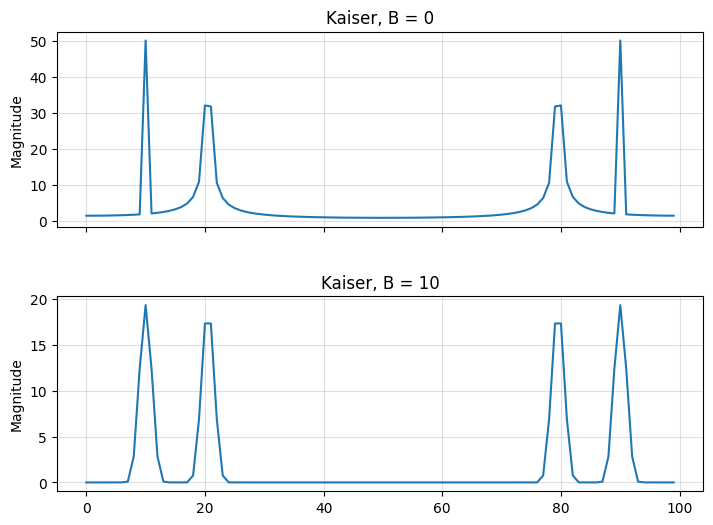

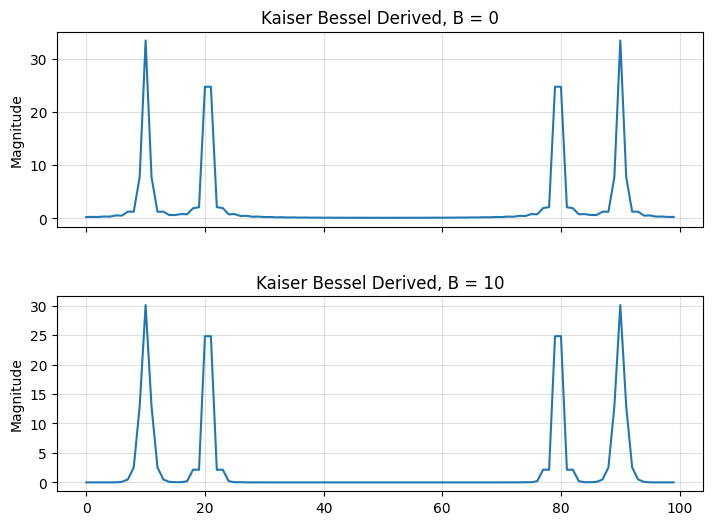

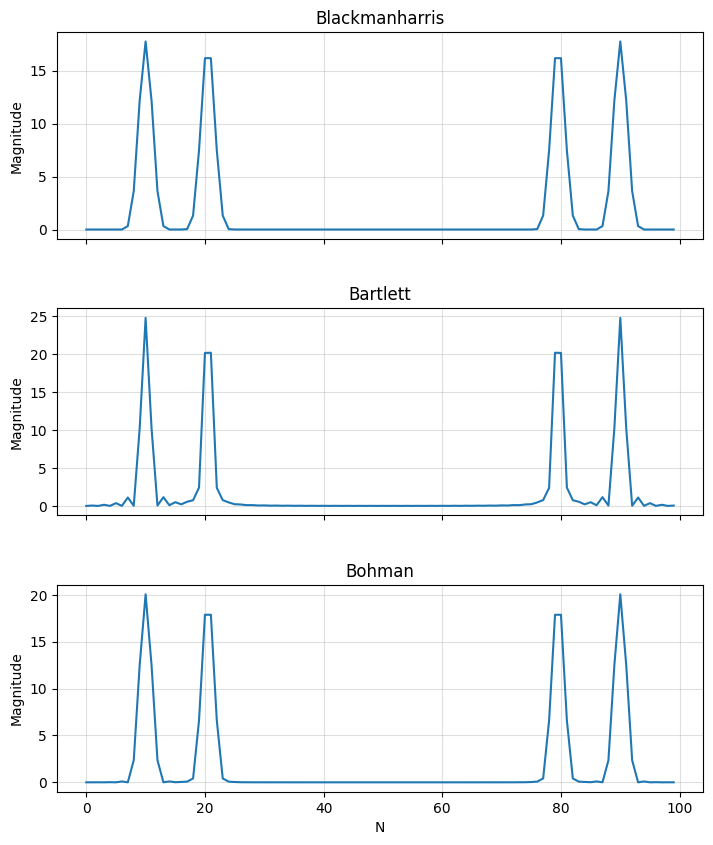

In [9]:
N = 100
t = np.arange(0, N * ts, ts)

x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)

x = x1 + x2

n = np.arange(N)

# Creating windows
kaiser_b1_window = signal.windows.kaiser(N, 0, sym = True)
kaiser_b2_window = signal.windows.kaiser(N, 10, sym = True)
kaiser_bessel_derived_b1_window = signal.windows.kaiser_bessel_derived(N, 0, sym = True)
kaiser_bessel_derived_b2_window = signal.windows.kaiser_bessel_derived(N, 10, sym = True)

w_blackmanharris = signal.windows.blackmanharris(N, sym = True)
w_bartlett = signal.windows.bartlett(N, sym = True)
w_taylor = signal.windows.bohman(N, sym = True)

# Applying windows to the signal
x_kaiser_b1_window = x * kaiser_b1_window
x_kaiser_b2_window = x * kaiser_b2_window
x_kaiser_bessel_derived_b1_window = x * kaiser_bessel_derived_b1_window
x_kaiser_bessel_derived_b2_window = x * kaiser_bessel_derived_b2_window
x_w_blackmanharris = x * w_blackmanharris
x_w_bartlett = x * w_bartlett
x_w_taylor = x * w_taylor

# FFTs
X11 = np.fft.fft(x_kaiser_b1_window, N)
X12 = np.fft.fft(x_kaiser_b2_window, N)
X21 = np.fft.fft(x_kaiser_bessel_derived_b1_window, N)
X22 = np.fft.fft(x_kaiser_bessel_derived_b2_window, N)

X3 = np.fft.fft(x_w_blackmanharris, N)
X4 = np.fft.fft(x_w_bartlett, N)
X5 = np.fft.fft(x_w_taylor, N)

# Plotting
fig, axs = plt.subplots(2, sharex = True)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].plot(n, np.abs(X11))
axs[0].set_title('Kaiser, B = 0')
axs[0].set_ylabel('Magnitude')

axs[1].plot(n, np.abs(X12))
axs[1].set_title('Kaiser, B = 10')
axs[1].set_ylabel('Magnitude')

plt.show()

fig, axs = plt.subplots(2, sharex = True)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].plot(n, np.abs(X21))
axs[0].set_title('Kaiser Bessel Derived, B = 0')
axs[0].set_ylabel('Magnitude')

axs[1].plot(n, np.abs(X22))
axs[1].set_title('Kaiser Bessel Derived, B = 10')
axs[1].set_ylabel('Magnitude')

plt.show()

fig, axs = plt.subplots(3, sharex = True)
for ax in axs:
    ax.grid(alpha = 0.4)
fig.set_figheight(9)
fig.set_figwidth(8)
fig.tight_layout(pad = 4.0)

axs[0].plot(n, np.abs(X3))
axs[0].set_title('Blackmanharris')
axs[0].set_ylabel('Magnitude')

axs[1].plot(n, np.abs(X4))
axs[1].set_title('Bartlett')
axs[1].set_ylabel('Magnitude')

axs[2].plot(n, np.abs(X5))
axs[2].set_title('Bohman')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('N')

plt.show()


A técnica de janelamento visa melhorar a resolução do sinal ao ajustar suas características, e cada tipo de janela tem propósitos específicos. No caso da janela Kaiser, há um parâmetro chamado beta que permite ajustar o sinal. Esse valor de beta afeta o formato da janela, controlando o equilíbrio entre a largura do lóbulo principal e a intensidade dos lóbulos laterais. Vale destacar que, à medida que o valor de beta aumenta, a janela se torna menos estreita.

## Análise DFT de um sinal real (áudio)

3. Os arquivos de áudio (formato wave) em anexo (individual para cada aluno, conforme listagem acima) contem a mesma nota musical executada em 2 diferentes instrumentos de orquestra. Aplique a função `fft` nos sinais fornecidos e sugira um valor de N *mínimo* necessário para realizar uma análise satisfatória dos sinal (por exemplo, para que seja possível identificar as frequências fundamental e as harmônicas dos sinais).
Retirado de:
https://www.ee.columbia.edu/~dpwe/sounds/instruments/

OBS1: tomar cuidado para selecionar um trecho representativo do sinal, evitando o início dos arquivos que contem silêncio.

OBS2: se desejado, pode-se realizar o janelamento.

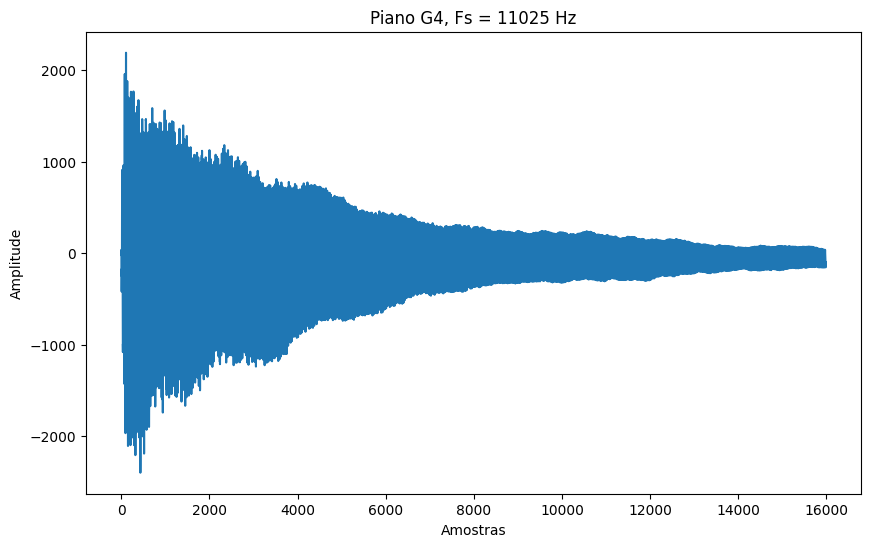

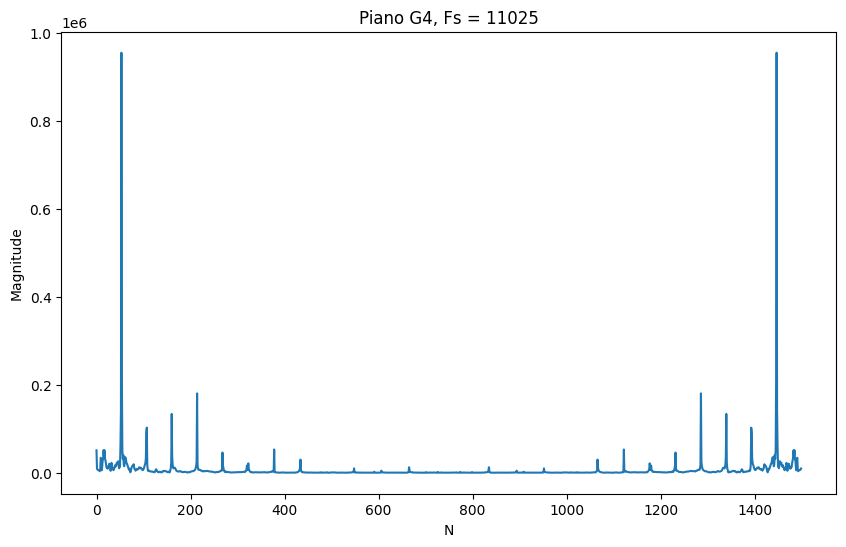

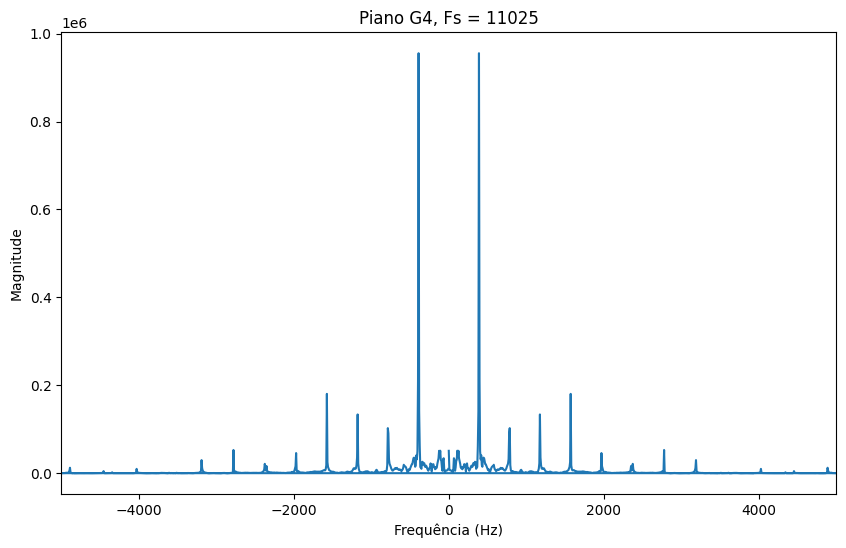

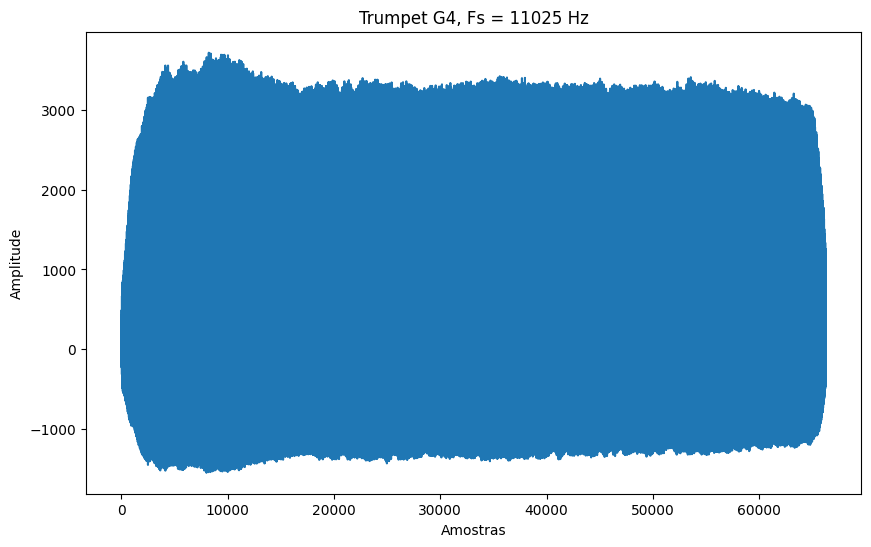

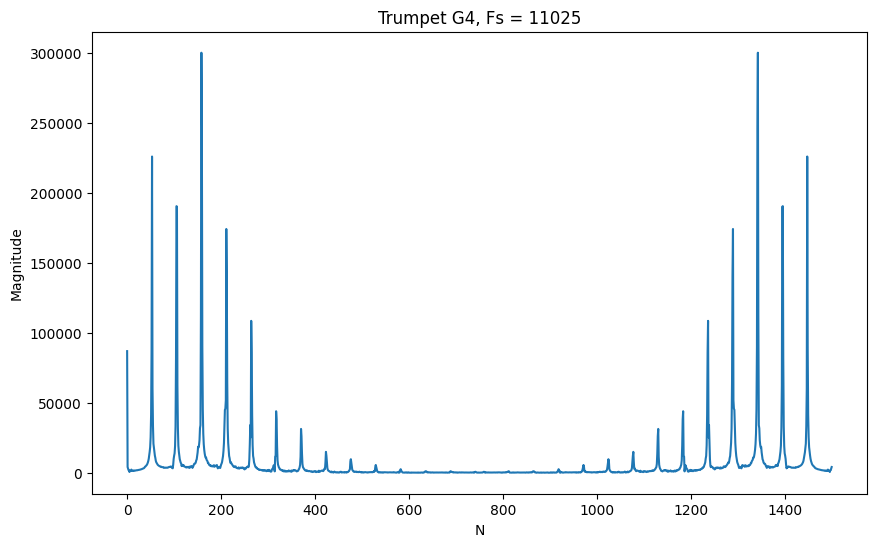

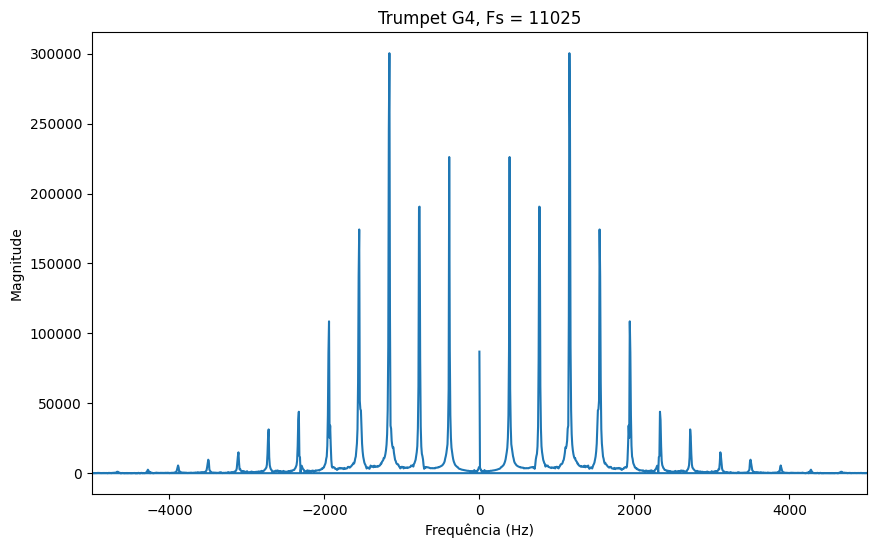

In [10]:
def plot_audio_details(audio, x, fs, N) -> None:
    title = audio.replace(".wav", '').replace('-', ' ')
    title = title[0].upper() + title[1:]

    plt.figure(figsize=(10, 6))
    plt.plot(x)
    plt.title(f"{title}, Fs = {fs} Hz")
    plt.xlabel("Amostras")
    plt.ylabel("Amplitude")
    plt.show()

    X = np.fft.fft(x, N)
    freq = np.fft.fftfreq(N, d=1 / fs)
    n = np.arange(N)

    plt.figure(figsize=(10, 6))
    plt.plot(n, abs(X))
    plt.title(f"{title}, Fs = {fs}")
    plt.xlabel("N")
    plt.ylabel("Magnitude")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(freq, abs(X))
    plt.title(f"{title}, Fs = {fs}")
    plt.xlim(-5000, 5000)
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

N = 1500

# For audio 1 Piano
fs, x = wavfile.read(audio1)

# Cut audio from 0.05 to 1.5 to only include the piano sound and not the silence
samples_to_cut_start = int(0.05 * fs)
samples_to_cut_end = int(1.5 * fs)
x = x[samples_to_cut_start:samples_to_cut_end]

plot_audio_details(audio1, x, fs, N)

# For audio 2
fs, x = wavfile.read(audio2)

# Cut audio from 0.79 to 6.8 to only include the piano sound and not the silence
samples_to_cut_start = int(0.79 * fs)
samples_to_cut_end = int(6.8 * fs)
x = x[samples_to_cut_start:samples_to_cut_end]

plot_audio_details(audio2, x, fs, N)


Observando os gráficos de Fourier gerados a partir dos sinais das notas G4 tocadas no piano e no trompete, podemos ver que, apesar de ambas as notas compartilharem a mesma frequência fundamental, o comportamento espectral dos dois instrumentos é bastante diferente.

No trompete, o espalhamento de frequências é significativamente maior do que no piano. Isso ocorre porque o timbre do trompete contém mais harmônicos de alta frequência e mais conteúdo de ruído. A instrumentação do trompete gera um espectro mais rico em frequências adicionais, resultando em um som mais cheio e com mais nuances do que o piano, que apresenta um som mais "limpo" e harmônicos mais bem definidos.

Enquanto no piano a fundamental é bem definida, com harmônicos que decaem rapidamente, no trompete as harmônicas continuam a aparecer de forma mais pronunciada em todo o espectro. Isso é evidente ao observar o número de picos e sua distribuição ao longo do eixo de frequência. No caso do trompete, temos picos mais amplos e mais frequentes, evidenciando o espalhamento maior do sinal, o que corresponde ao fato de que o trompete produz um som mais complexo em termos de frequências.

Além disso, o piano, com suas harmônicas rapidamente decrescentes, mostra um comportamento de decaimento de frequências mais rápido, o que pode ser interpretado como um som mais estável e "limpo". Por outro lado, o trompete possui harmônicas que se estendem por uma faixa maior de frequências e um espalhamento mais evidente, resultando em um som mais rico e vibrante, mas também mais "sujo" em comparação ao piano.